In [ ]:
import numpy as np
import random

In [ ]:
def perceptron(n_list, d, limit):
    w_list=[]
    for i in range(d+1):
        w_list.append(0.0)
    count=0
    #update=0
    
    while count <4000:
        for i in range(limit):
            x_i=n_list[i]
            activation=0
            for j in range(d+1):
                activation= activation+w_list[j]*x_i[j]
                
                if activation >= 0:
                    y_pred = 1
                else:
                    y_pred = -1
                
                if y_pred != x_i[d+1]:
                    w_list=[(w_list[k] + x_i[d+1]* x_i[k]) for k in range(d+1)]
                    #update= update+1
        count=count+1
    #print("Update:", update)
    return(w_list)   

In [ ]:
n_data_points = 2000

rad = 10
thk = 5
sep = 5

In [ ]:
c1 = np.array([(rad+thk)/2, sep/2])
c2 =  np.array([-(rad+thk)/2, -sep/2])

In [ ]:

r1 = np.random.rand(n_data_points)*thk+rad
a1 = np.random.rand(n_data_points)*np.pi

r2 = np.random.rand(n_data_points)*thk+rad
a2 = np.random.rand(n_data_points)*np.pi+np.pi


p1 = np.array((r1*np.cos(a1), r1*np.sin(a1)))
p2 = np.array((r2*np.cos(a2), r2*np.sin(a2)))

In [ ]:
x1, y1 = (p1[0] - c1[0], p1[1] + c1[1])
x2, y2 = (p2[0] - c2[0], p2[1] + c2[1])


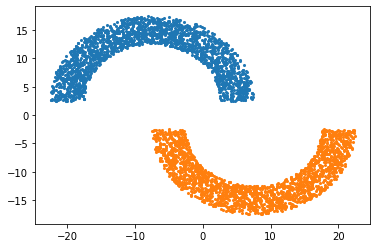

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x1, y1, marker='.', linewidths=0.1)
plt.scatter(x2, y2, marker='.', linewidths=0.1)
plt.show()

In [ ]:
def line(m,c,x):
    x= np.arange(-30, x)
    y = m*x + c
    return x,y

In [ ]:
def line1(w):
    m= -w[1]/w[2]
    c= -w[0]/w[2]
    x,y= line(m,c,30)
    return x,y

In [ ]:
print(x1)
print(len(x1))
print(y1)
print(len(y1))

print(x2)
print(len(x2))
print(y2)
print(len(y2))

[-16.58291063 -10.92375252 -10.5342851  ... -18.36043535  -7.94191958
   0.04218706]
2000
[ 7.08581043 16.86255102 14.97373888 ...  8.90433383 16.65043553
 14.75878127]
2000
[15.21625418  7.85258009 10.12993218 ...  6.0121657   7.85175008
 17.48948889]
2000
[-11.34406252 -13.3408636  -15.20634464 ... -14.27912619 -16.97722747
  -6.24499618]
2000


In [ ]:
negative = np.array([-1 for i in range(2000)])
print(negative)
print(len(negative))
positive = np.array([1 for i in range(2000)])
print(positive)
print(len(positive))

[-1 -1 -1 ... -1 -1 -1]
2000
[1 1 1 ... 1 1 1]
2000


In [ ]:
X1 = np.stack((positive,x1, y1,negative), axis=1)
print(X1)
print(len(X1))
X2 = np.stack((positive,x2, y2,positive), axis=1)
print(X2)
print(len(X2))

[[  1.         -16.58291063   7.08581043  -1.        ]
 [  1.         -10.92375252  16.86255102  -1.        ]
 [  1.         -10.5342851   14.97373888  -1.        ]
 ...
 [  1.         -18.36043535   8.90433383  -1.        ]
 [  1.          -7.94191958  16.65043553  -1.        ]
 [  1.           0.04218706  14.75878127  -1.        ]]
2000
[[  1.          15.21625418 -11.34406252   1.        ]
 [  1.           7.85258009 -13.3408636    1.        ]
 [  1.          10.12993218 -15.20634464   1.        ]
 ...
 [  1.           6.0121657  -14.27912619   1.        ]
 [  1.           7.85175008 -16.97722747   1.        ]
 [  1.          17.48948889  -6.24499618   1.        ]]
2000


In [ ]:
n = np.concatenate((X1,X2),axis=0)
print(n)
print(len(n))

[[  1.         -16.58291063   7.08581043  -1.        ]
 [  1.         -10.92375252  16.86255102  -1.        ]
 [  1.         -10.5342851   14.97373888  -1.        ]
 ...
 [  1.           6.0121657  -14.27912619   1.        ]
 [  1.           7.85175008 -16.97722747   1.        ]
 [  1.          17.48948889  -6.24499618   1.        ]]
4000


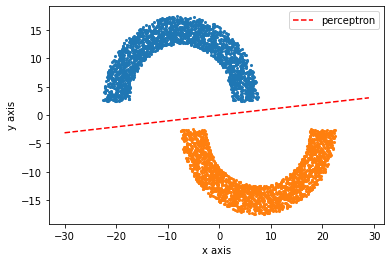

In [ ]:
limit=4000
w= perceptron(n,2,limit)
x3,y3= line1(w)

plt.plot(x3, y3, '--', label='perceptron', color='red')
plt.scatter(x1, y1, marker='.', linewidths=0.1)
plt.scatter(x2, y2, marker='.', linewidths=0.1)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend()
plt.show()


In [ ]:
x = n[:, [1,2]]
y= n[:,3]
print(x)
print(y)

[[-16.58291063   7.08581043]
 [-10.92375252  16.86255102]
 [-10.5342851   14.97373888]
 ...
 [  6.0121657  -14.27912619]
 [  7.85175008 -16.97722747]
 [ 17.48948889  -6.24499618]]
[-1. -1. -1. ...  1.  1.  1.]


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()
reg.fit(x, y)
w = reg.coef_
b = reg.intercept_
m = -(b / w[1]) / (b / w[0])
c= -b / w[1]
x4,y4= line(m,c,30)

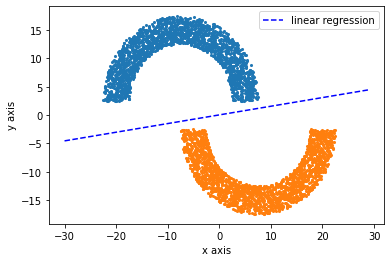

In [ ]:
plt.plot(x4, y4, '--',label='linear regression', color='blue')
plt.scatter(x1, y1, marker='.', linewidths=0.1)
plt.scatter(x2, y2, marker='.', linewidths=0.1)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend()
plt.show()

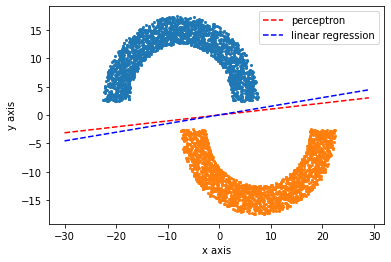

In [ ]:
plt.plot(x3, y3, '--', label='perceptron', color='red')
plt.plot(x4, y4, '--',label='linear regression', color='blue')
plt.scatter(x1, y1, marker='.', linewidths=0.1)
plt.scatter(x2, y2, marker='.', linewidths=0.1)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend()
plt.show()

In [15]:
import numpy as np
from functools import partial
import matplotlib.pyplot as plt
import math

In [16]:
from matplotlib.font_manager import FontProperties

In [17]:
def sample(lb, ub, sz):
    return lb + np.random.random_sample((sz,))*(ub-lb)

In [18]:
def avg_g(x, gdfunc, num_samples, targetfunc):
    #compute the average hypothesis \bar{g} at given point x
    bias_at_x = 0
    gd_funcs = []
    for i in range(num_samples):
        #generate 2 sample data each time
        x1, x2 = sample(-1, 1, 2)
        v = gdfunc(x, x1, x2)
        gd_funcs.append(v)
        
    average_gfunc_at_x = np.mean(gd_funcs)
    #print('x: ', x, 'average_gfunc_at_x: ', average_gfunc_at_x)
    variance_gfunc_at_x = np.var(gd_funcs)
    bias_at_x = (average_gfunc_at_x - targetfunc(x))**2
    return average_gfunc_at_x, variance_gfunc_at_x, bias_at_x

In [38]:
def calc_bias_var_eout(gd_func, target_func, num_data_samples, num_x_samples):
    variances, biases, eouts = [], [], []
    for i in range(num_x_samples):
        x = sample(-1, 1, 1)
        _, variance, bias = avg_g(x, gd_func, num_data_samples, target_func)
        variances.append(variance)
        biases.append(bias)

        # Compute the expected value of out-of-sample error w.r.t. data
        eout_on_data = []
        for i in range(num_data_samples):
            x1, x2 = sample(-1, 1, 2)
            v= gd_func(x, x1, x2)
            eout_on_data.append((v-target_func(x))**2) # (g^{D}(x) - f(x))**2

        eout_data_avg = np.mean(eout_on_data)
        eouts.append(eout_data_avg)

    variance = np.mean(variances)    
    bias = np.mean(biases)
    eout = np.mean(eouts)
    print('The variance is: ', variance)
    print('The bias is: ', bias)
    print('The expected out-of-sample error is: ', eout)
    print('The variance+bias is: ', variance+bias)


    xs = np.arange(-1, 1, 0.1)
    true_f, avg_gf, var_gf = [],[], []
    for x in xs:
        true_f.append(target_func(x))
        mean_g, var_g, bias_g = avg_g(x, gd_func, num_data_samples, target_func)
        avg_gf.append(mean_g)
        var_gf.append(var_g)
        
    plt.plot(xs, true_f, color='red', label='f(x)')
    plt.plot(xs, avg_gf, color='blue', label='g_bar(x)')
    legend_x = 2.0
    legend_y = 0.5
    plt.legend()



In [25]:
def gd_func(x, x1, x2):
    #hypothesis found by learning algorithm
    a = x1 + x2
    b = -x1 * x2
    return a*x + b

The variance is:  0.32820260059550616
The bias is:  0.1932961127591476
The expected out-of-sample error is:  0.5212010382103563
The variance+bias is:  0.5214987133546538


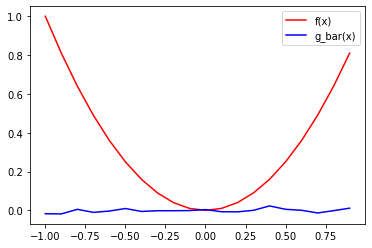

In [39]:
num_data_samples = 2000
num_x_samples = 2000   
calc_bias_var_eout(gd_func, lambda x: x**2, num_data_samples, num_x_samples)   